<a href="https://colab.research.google.com/github/AndresCMontejo/Telecom_X/blob/main/TelecomX_An%C3%A1lisis_de_evasi%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALISIS DE EVASIÓN DE CLIENTES**

### **Extracción de datos**

In [2]:
import pandas as pd
import requests
import json
datos_clientes = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
resultado = json.loads(datos_clientes.text)
df = pd.DataFrame(resultado)
df.to_json('TelecomX_ClientesT', orient='records')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### **Normalizandos datos**

In [3]:
#Leyendo el archivo json usando el módulo Python JSON
with open('/content/TelecomX_ClientesT','r') as f:
    datos = json.loads(f.read())
df_f = pd.json_normalize(datos)
df_f.sample(n=20)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
1225,1752-OZXFY,No,Male,0,Yes,No,60,Yes,No,DSL,...,No,No,No,Yes,No,One year,Yes,Mailed check,59.80,3561.15
3268,4558-FANTW,Yes,Female,0,Yes,Yes,17,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,91.85,1574.45
2784,3863-IUBJR,Yes,Male,0,Yes,Yes,12,Yes,No,DSL,...,No,No,No,No,Yes,One year,No,Credit card (automatic),53.65,696.35
4350,5968-XQIVE,No,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,One year,Yes,Electronic check,89.70,6588.95
6147,8406-LNMHF,No,Male,1,Yes,No,59,Yes,No,Fiber optic,...,Yes,Yes,No,No,No,One year,Yes,Credit card (automatic),82.95,4903.15
5038,6892-EZDTG,Yes,Female,0,Yes,No,4,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.65,365.4
7107,9786-YWNHU,No,Female,0,Yes,Yes,63,Yes,No,DSL,...,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2
1189,1698-XFZCI,No,Male,0,No,No,61,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,107.75,6521.9
6576,9050-IKDZA,No,Female,1,No,No,2,Yes,No,Fiber optic,...,No,No,No,Yes,No,Month-to-month,No,Mailed check,81.50,162.55
2066,2908-WGAXL,No,Female,0,Yes,Yes,56,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1468.9


### **Manejo de inconsistencias**

In [4]:
df_f.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')
df_f.columns = df_f.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [5]:
#Sustituyendo valores de 0 y 1 por yes or no en la columna de: customer_seniorcitizen
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].astype(str)
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].map({'0': 'No', '1': 'Yes'})
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   object 
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [6]:
df_f.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
df_f = df_f.replace('No phone service', 'No')
df_f = df_f.replace('No internet service', 'No')
df_f.sample(n=100)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
3822,5229-PRWKT,Yes,Male,No,No,No,8,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.55,649.65
7120,9800-ONTFE,No,Female,No,Yes,Yes,22,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.80,1615.1
5629,7688-AWMDX,No,Male,No,Yes,No,71,Yes,No,DSL,...,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),54.50,3778.2
1229,1757-TCATG,No,Male,No,Yes,Yes,35,Yes,No,No,...,No,No,No,No,No,One year,No,Bank transfer (automatic),20.05,746.75
700,0999-QXNSA,No,Male,Yes,No,Yes,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.75,344.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,7997-EASSD,No,Female,No,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,One year,Yes,Credit card (automatic),81.20,4965.1
131,0220-EBGCE,Yes,Male,No,No,No,2,Yes,No,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.85,167.3
5105,6979-ZNSFF,Yes,Female,No,No,No,8,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,87.05,762.1
5595,7639-SUPCW,Yes,Female,No,No,No,22,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),48.80,1054.6


In [8]:
#la columna account_charges_total es detectada como object, cuando debería de ser float64
df_f['account_charges_total'] = pd.to_numeric(df_f['account_charges_total'], errors='coerce')
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   object 
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

### **Validando que no existan otras inconsistencias**

In [9]:
for col in df_f.select_dtypes(include='object').columns:
    print(col, df_f[col].unique())

df_f.describe(include='all')

customerid ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn ['No' 'Yes' '']
customer_gender ['Female' 'Male']
customer_seniorcitizen ['No' 'Yes']
customer_partner ['Yes' 'No']
customer_dependents ['Yes' 'No']
phone_phoneservice ['Yes' 'No']
phone_multiplelines ['No' 'Yes']
internet_internetservice ['DSL' 'Fiber optic' 'No']
internet_onlinesecurity ['No' 'Yes']
internet_onlinebackup ['Yes' 'No']
internet_deviceprotection ['No' 'Yes']
internet_techsupport ['Yes' 'No']
internet_streamingtv ['Yes' 'No']
internet_streamingmovies ['No' 'Yes']
account_contract ['One year' 'Month-to-month' 'Two year']
account_paperlessbilling ['Yes' 'No']
account_paymentmethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
count,7267,7267,7267,7267,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000
unique,7267,3,2,2,2,2,NaN,2,2,3,...,2,2,2,2,2,3,2,4,NaN,NaN
top,9995-HOTOH,No,Male,No,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,5174,3675,6085,3749,5086,NaN,6560,4202,3198,...,4763,4776,5163,4477,4451,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,NaN,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000


### **Estandarización y transformación de datos**

In [10]:
#Sustituyendo valores Si y No por 0 o 1 en la columna de: customer_seniorcitizen
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].map({'No': '0', 'Yes': '1'})
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].astype(int)
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [11]:
#COLUMNA CUENTAS DIARIAS
df_f['cuentas_diarias'] = df_f['account_charges_monthly'] / 30.44

In [12]:
df_f.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


In [13]:
#Sustituyendo No por 0, y Yes por 1
df_f = df_f.replace('No', '0')
df_f = df_f.replace('Yes', '1')
df_f.sample(n=100)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
2185,3059-NGMXB,0,Male,0,1,1,14,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,69.20,944.65,2.273325
6198,8510-AWCXC,1,Female,1,0,0,13,1,1,Fiber optic,...,0,0,1,1,Month-to-month,1,Electronic check,100.80,1308.10,3.311432
4437,6080-TCMYC,0,Male,0,1,1,40,1,1,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,81.20,3292.30,2.667543
2750,3803-KMQFW,1,Female,0,1,1,1,1,0,0,...,0,0,0,0,Month-to-month,0,Mailed check,20.55,20.55,0.675099
2189,3066-RRJIO,1,Female,0,0,0,1,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Mailed check,69.95,69.95,2.297963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,8234-GSZYK,0,Male,0,0,0,43,1,1,0,...,0,0,0,0,Two year,0,Bank transfer (automatic),26.45,1110.05,0.868922
4451,6103-BOCOU,0,Female,0,0,0,26,1,1,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,80.70,2193.00,2.651117
3776,5180-UCIIQ,1,Male,1,1,1,22,0,0,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,40.05,880.20,1.315703
1647,2338-BQEZT,0,Female,0,0,0,55,1,0,DSL,...,0,0,0,0,Month-to-month,1,Credit card (automatic),50.55,2832.75,1.660644


In [14]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [15]:
#Transformando columnas con object en int64 (para los valores 0 y 1)
import numpy as np
df_f = df_f.replace('', np.nan)

cols_to_convert = ['churn', 'customer_partner', 'customer_dependents', 'phone_phoneservice', 'phone_multiplelines',
                   'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection',
                   'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies',
                   'account_paperlessbilling']

df_f = df_f.dropna(subset=cols_to_convert)
df_f[cols_to_convert] = df_f[cols_to_convert].astype('int64')
df_f.sample(n=20)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
6444,8857-CUPFQ,0,Male,0,1,0,63,1,0,0,...,0,0,0,0,Two year,0,Mailed check,19.25,1237.65,0.632392
1630,2320-JRSDE,1,Female,0,1,1,1,1,0,0,...,0,0,0,0,Month-to-month,1,Electronic check,19.90,19.90,0.653745
6336,8717-VCTXJ,0,Male,0,0,0,42,1,0,0,...,0,0,0,0,One year,1,Mailed check,19.55,839.40,0.642247
7063,9725-SCPZG,1,Male,0,0,1,1,1,0,Fiber optic,...,0,0,1,1,Month-to-month,1,Electronic check,90.85,90.85,2.984560
6698,9224-VTYID,0,Male,0,1,1,47,1,1,DSL,...,1,1,1,1,Two year,1,Mailed check,90.50,4318.35,2.973062
5665,7740-BTPUX,0,Male,1,1,0,55,1,1,Fiber optic,...,1,1,1,1,Two year,1,Electronic check,113.60,6292.70,3.731932
3015,4189-NAKJS,0,Male,0,0,0,26,1,1,DSL,...,0,0,0,0,One year,1,Credit card (automatic),51.55,1295.40,1.693495
4153,5696-CEIQJ,0,Male,0,1,1,67,1,0,Fiber optic,...,1,1,1,1,Two year,0,Bank transfer (automatic),103.15,6895.50,3.388633
6349,8735-DCXNF,0,Male,0,1,0,10,1,0,DSL,...,0,1,0,0,Month-to-month,1,Credit card (automatic),54.95,568.85,1.805191
2523,3521-SYVOR,1,Female,0,0,0,37,1,0,DSL,...,0,0,1,1,Month-to-month,1,Electronic check,64.75,2345.20,2.127135


In [16]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   int64  
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   int64  
 11  internet_onlinebackup      7043 non-null   int64  
 12  internet_deviceprotection  7043 non-null   int64  
 13  internet_techsupport       7043 non-null   int64  
 1

### **Analisis descriptivo**

In [17]:
df_f.describe()

,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_paperlessbilling,account_charges_monthly,account_charges_total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.127519
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.988504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.166229
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.311104
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.951708
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.901117


### **Distribución de evasión**

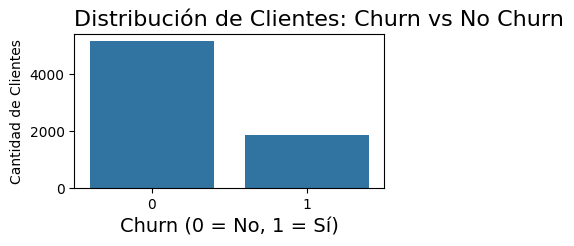

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Conteo de valores
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=df_f, x='churn')
ax.set_title('Distribución de Clientes: Churn vs No Churn',
             loc='left', fontsize=16)
ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=14)
ax.set_ylabel('Cantidad de Clientes')
plt.show()